In [738]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import keras

In [739]:
np.random.seed(42)

In [740]:
import pandas as pd
dataset = pd.read_csv("./heart-disease/heart.csv")
dataset.shape

(303, 14)

In [741]:
X, y = dataset.iloc[:, :-1], dataset.loc[:, 'target']

In [742]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=86)


In [743]:
#y_train = np_utils.to_categorical(y_train, 2)
#y_test = np_utils.to_categorical(y_test, 2)

In [744]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [745]:
model = Sequential()
model.add(Dense(44, input_dim=13, kernel_initializer='random_normal', activation='relu'))
#model.add(Dense(1, input_dim=44, kernel_initializer='random_normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [746]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 44)                616       
_________________________________________________________________
dense_160 (Dense)            (None, 1)                 45        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________
None


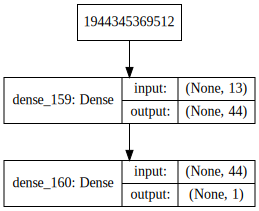

In [747]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [748]:
from keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(monitor='loss')

In [749]:
from keras.callbacks import TensorBoard  
tensorboard = TensorBoard(log_dir='../logs/', write_graph=True)

In [750]:
%%time
model.fit(X_train_scaled, y_train, batch_size=200, epochs=100, validation_split=0.2, callbacks=[early_stopping, tensorboard], verbose=2);

Train on 193 samples, validate on 49 samples
Epoch 1/100
 - 1s - loss: 0.6995 - acc: 0.4456 - val_loss: 0.6956 - val_acc: 0.4694
Epoch 2/100
 - 0s - loss: 0.6972 - acc: 0.4611 - val_loss: 0.6928 - val_acc: 0.4898
Epoch 3/100
 - 0s - loss: 0.6949 - acc: 0.4819 - val_loss: 0.6900 - val_acc: 0.5102
Epoch 4/100
 - 0s - loss: 0.6926 - acc: 0.5130 - val_loss: 0.6872 - val_acc: 0.5918
Epoch 5/100
 - 0s - loss: 0.6904 - acc: 0.5596 - val_loss: 0.6843 - val_acc: 0.6327
Epoch 6/100
 - 0s - loss: 0.6881 - acc: 0.6321 - val_loss: 0.6815 - val_acc: 0.6735
Epoch 7/100
 - 0s - loss: 0.6858 - acc: 0.6632 - val_loss: 0.6786 - val_acc: 0.7143
Epoch 8/100
 - 0s - loss: 0.6835 - acc: 0.6943 - val_loss: 0.6757 - val_acc: 0.8367
Epoch 9/100
 - 0s - loss: 0.6813 - acc: 0.7047 - val_loss: 0.6728 - val_acc: 0.8776
Epoch 10/100
 - 0s - loss: 0.6789 - acc: 0.7358 - val_loss: 0.6698 - val_acc: 0.9184
Epoch 11/100
 - 0s - loss: 0.6766 - acc: 0.7461 - val_loss: 0.6668 - val_acc: 0.9184
Epoch 12/100
 - 0s - loss: 0.

Epoch 97/100
 - 0s - loss: 0.3766 - acc: 0.8705 - val_loss: 0.3477 - val_acc: 0.8776
Epoch 98/100
 - 0s - loss: 0.3744 - acc: 0.8705 - val_loss: 0.3465 - val_acc: 0.8776
Epoch 99/100
 - 0s - loss: 0.3722 - acc: 0.8705 - val_loss: 0.3454 - val_acc: 0.8776
Epoch 100/100
 - 0s - loss: 0.3701 - acc: 0.8705 - val_loss: 0.3444 - val_acc: 0.8776
Wall time: 10.3 s


In [751]:
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Доля верных ответов на тестовых данных: %.2f%%" % (scores[1]*100))

Доля верных ответов на тестовых данных: 85.25%
